In [1]:
import numpy as np
import pandas as pd
from datetime import date
from random import seed
from random import random

import time
import scipy, scipy.signal
import os, os.path
import shutil
import matplotlib
import matplotlib.pyplot as plt

from pylab import imshow
from matplotlib.image import imread
# vgg16 model used for transfer learning on the dogs and cats dataset
from matplotlib import pyplot
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
import tensorflow as tf
# from keras.optimizers import SGD

from keras.layers import Conv2D
from keras.layers import MaxPooling2D

# from keras.optimizers import gradient_descent_v2
# SGD = gradient_descent_v2.SGD(...)

from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

import h5py
import sys
sys.path.append('/Users/hn/Documents/00_GitHub/Ag/NASA/Python_codes/')
import NASA_core as nc
# import NASA_plot_core as rcp

In [2]:
# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array
# from keras.models import load_model

In [3]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model

In [4]:
vi_idx = "EVI"
# train_folder = '/Users/hn/Documents/01_research_data/NASA/ML_data/SG_train_images_' + vi_idx + '/'
# test_folder = "/Users/hn/Documents/01_research_data/NASA/ML_data/limitCrops_nonExpert_images/"

# Make Prediction

In [7]:
model_dir = "/Users/hn/Documents/01_research_data/NASA/ML_Models/"
model = load_model(model_dir + '01_TL_SingleDoubleEVI_SG_train80.h5')

In [8]:
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# # load an image and predict the class
# def run_example():
#     # load the image
#     test_dir = "/Users/hn/Documents/01_research_data/NASA/ML_data/limitCrops_nonExpert_images_" + vi_idx + "/"
#     img = load_image(test_dir+'double_101682_WSDA_SF_2018.jpg')
#     # load model
#     model_dir = "/Users/hn/Documents/01_research_data/NASA/ML_Models/"
#     model = load_model(model_dir + '01_TL_SingleDouble.h5')
#     # predict the class
#     result = model.predict(img)
#     print(result[0])

# entry point, run the example
# run_example()


1/1 [==============================] - 0s 202ms/step
probability of being single cropped is [0.00694239].


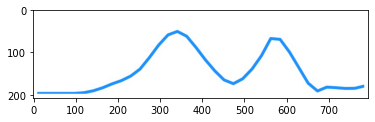

In [10]:
file_name = 'double_101163_WSDA_SF_2017.jpg'
test_dir = "/Users/hn/Documents/01_research_data/NASA/ML_data/" + \
           "/limitCrops_nonExpert_images_" + vi_idx + "/"
img = load_image(test_dir+file_name)
result = model.predict(img)
print ("probability of being single cropped is {}.".format(result[0]))

pyplot.subplot(111)
# define filename
filename = img
image = imread(test_dir+file_name)
pyplot.imshow(image)
pyplot.show()

# Test Phase

#### Test set from expert labels

In [11]:
training_set_dir = "/Users/hn/Documents/01_research_data/NASA/ML_data/"
ground_truth_labels = pd.read_csv(training_set_dir+"train_labels.csv")

In [13]:
expert_test_dir = "/Users/hn/Documents/01_research_data/NASA/ML_data/SG_train_images_" + vi_idx + "/test20/"

test_filenames = os.listdir(expert_test_dir)
expert_test_df = pd.DataFrame({
                               'filename': test_filenames
                                    })
nb_samples = expert_test_df.shape[0]

expert_test_df["human_predict"] = expert_test_df.filename.str.split("_", expand=True)[0]
expert_test_df["prob_single"]=-1.0
print (expert_test_df.shape)
expert_test_df.head(2)

(269, 3)


,filename,human_predict,prob_single
0,single_111436_WSDA_SF_2017.jpg,single,-1.0
1,single_38745_WSDA_SF_2018.jpg,single,-1.0


In [15]:
# load an image and predict the class
def run_example():
    # load the image
    test_dir = experts_test_dir = "/Users/hn/Documents/01_research_data/NASA/ML_data/" + \
                                  "/SG_train_images_" + vi_idx + "/test20/"
    
    img = load_image(test_dir+'double_1624_WSDA_SF_2016.jpg')
    # load model
    model_dir = "/Users/hn/Documents/01_research_data/NASA/ML_Models/"
    model = load_model(model_dir + '01_TL_SingleDoubleEVI_SG_train80.h5')
    result = model.predict(img)
    print(result[0])

# entry point, run the example
run_example()

1/1 [==============================] - 0s 159ms/step
[0.00186826]


In [16]:
# We have done this once before. So, commented out here. and read below.

# for idx in expert_test_df.index:
#     img = load_image(expert_test_dir + expert_test_df.loc[idx, 'filename'])
#     expert_test_df.loc[idx, 'prob_single'] = model.predict(img)[0][0]
    

# for prob in [0.3, 0.4, 0.5, 0.6, 0.7]:
#     colName = "prob_point"+str(prob)[2:]
#     expert_test_df.loc[expert_test_df.prob_single<prob, colName] = 'double'
#     expert_test_df.loc[expert_test_df.prob_single>=prob, colName] = 'single'

# out_dir = "/Users/hn/Documents/01_research_data/NASA/ML_data/01_transfer_learning_result/"
# os.makedirs(out_dir, exist_ok=True)
# out_name = out_dir + "01_TL_Expert_testSet_predictions_" + vi_idx + ".csv"
# expert_test_df.to_csv(out_name, index = False)

In [17]:
expert_test_df.head(3)

,filename,human_predict,prob_single
0,single_111436_WSDA_SF_2017.jpg,single,-1.0
1,single_38745_WSDA_SF_2018.jpg,single,-1.0
2,single_158665_WSDA_SF_2015.jpg,single,-1.0


In [20]:
out_dir = "/Users/hn/Documents/01_research_data/NASA/ML_data/01_transfer_learning_result/"
os.makedirs(out_dir, exist_ok=True)
expert_test_df = pd.read_csv(out_dir + "01_SG_TL_Expert_testSet_predictions_" + vi_idx + ".csv")
expert_test_df.head(2)

,filename,human_predict,prob_single,prob_point3,prob_point4,prob_point5,prob_point6,prob_point7
0,double_100707_WSDA_SF_2017.jpg,double,0.022667,double,double,double,double,double
1,double_101657_WSDA_SF_2018.jpg,double,0.002078,double,double,double,double,double


In [21]:
for ii in [3, 4, 5, 6, 7]:
    curr_prob = "prob_point"+str(ii)
    curr_pred_type = "predType_point" + str(ii)
    expert_test_df[curr_pred_type]="a"
    for idx in expert_test_df.index:
        if expert_test_df.loc[idx, "human_predict"]==expert_test_df.loc[idx, curr_prob]=="single":
            expert_test_df.loc[idx, curr_pred_type]="True Single"
        elif expert_test_df.loc[idx, "human_predict"]==expert_test_df.loc[idx, curr_prob]=="double":
            expert_test_df.loc[idx, curr_pred_type]="True Double"
        elif expert_test_df.loc[idx, "human_predict"]=="double" and expert_test_df.loc[idx, curr_prob]=="single":
            expert_test_df.loc[idx, curr_pred_type]="False Single"
        elif expert_test_df.loc[idx, "human_predict"]=="single" and expert_test_df.loc[idx, curr_prob]=="double":
            expert_test_df.loc[idx, curr_pred_type]="False Double"

In [22]:
expert_test_df.head(2)

,filename,human_predict,prob_single,prob_point3,prob_point4,prob_point5,prob_point6,prob_point7,predType_point3,predType_point4,predType_point5,predType_point6,predType_point7
0,double_100707_WSDA_SF_2017.jpg,double,0.022667,double,double,double,double,double,True Double,True Double,True Double,True Double,True Double
1,double_101657_WSDA_SF_2018.jpg,double,0.002078,double,double,double,double,double,True Double,True Double,True Double,True Double,True Double


In [23]:
needed_cols = ["predType_point3", "predType_point4", 
               "predType_point5", 
               "predType_point6", "predType_point7"]
expert_test_df_trimmed = expert_test_df[needed_cols].copy()
expert_test_df_trimmed.head(2)

,predType_point3,predType_point4,predType_point5,predType_point6,predType_point7
0,True Double,True Double,True Double,True Double,True Double
1,True Double,True Double,True Double,True Double,True Double


In [24]:
TFR=pd.DataFrame()
for col in expert_test_df_trimmed.columns:
    TFR[col]=expert_test_df_trimmed[col].value_counts()
TFR.reset_index(inplace=True)
TFR.rename(columns={"index": "TF_type"})
TFR

,index,predType_point3,predType_point4,predType_point5,predType_point6,predType_point7
0,True Single,216,216,215,215,214
1,True Double,45,45,46,47,47
2,False Single,5,5,4,3,3
3,False Double,3,3,4,4,5


In [65]:
out_dir = "/Users/hn/Documents/01_research_data/NASA/ML_data/01_transfer_learning_result/"
out_name = out_dir + "01_SG_TL_expert_" + vi_idx + "_count_TFPR.csv"
TFR.to_csv(out_name, index = False)

In [40]:
expert_test_df["ID"] = expert_test_df.filename.str.split("_", expand=True)[1]+ "_" + \
                       expert_test_df.filename.str.split("_", expand=True)[2]+ "_" + \
                       expert_test_df.filename.str.split("_", expand=True)[3]+ "_" + \
                       expert_test_df.filename.str.split("_", expand=True)[4].str.split(".", expand=True)[0]

In [25]:
meta_dir = "/Users/hn/Documents/01_research_data/NASA/parameters/"
meta = pd.read_csv(meta_dir+"evaluation_set.csv")
meta_moreThan10Acr=meta[meta.ExctAcr>10]
print (meta.shape)
print (meta_moreThan10Acr.shape)
meta.head(2)

(6340, 8)
(3539, 8)


,ID,CropTyp,Irrigtn,DataSrc,Acres,ExctAcr,LstSrvD,county
0,100010_WSDA_SF_2017,alfalfa hay,center pivot,wsda,34,34.310305,2017/09/12,Grant
1,100204_WSDA_SF_2017,alfalfa hay,center pivot,wsda,62,61.826535,2017/08/09,Grant


In [42]:
expert_test_df = pd.merge(expert_test_df, meta, on=['ID'], how='left')
expert_test_df.head(2)

,filename,human_predict,prob_single,prob_point3,prob_point4,prob_point5,prob_point6,prob_point7,predType_point3,predType_point4,...,predType_point6,predType_point7,ID,CropTyp,Irrigtn,DataSrc,Acres,ExctAcr,LstSrvD,county
0,double_100707_WSDA_SF_2017.jpg,double,0.022667,double,double,double,double,double,True Double,True Double,...,True Double,True Double,100707_WSDA_SF_2017,yellow mustard,center pivot/sprinkler,wsda,148,147.739566,2017/10/16,Grant
1,double_101657_WSDA_SF_2018.jpg,double,0.002078,double,double,double,double,double,True Double,True Double,...,True Double,True Double,101657_WSDA_SF_2018,"corn, field",center pivot,wsda,131,131.160346,2018/09/04 00:00:00,Franklin


In [45]:
acr_predTypes = pd.DataFrame(columns=['pred_type'])
lst = ['False Single', 'False Double', 'True Double', 'True Single']
acr_predTypes["pred_type"] = lst

for ii in [3, 4, 5, 6, 7]:
    curr_col = "predType_point" + str(ii)
    A = expert_test_df[[curr_col, 'Acres']].groupby([curr_col]).sum()
    A.rename(columns={"Acres": "Acres_point"+ str(ii)}, inplace=True)
    acr_predTypes = pd.merge(acr_predTypes, A.reset_index(), 
                             left_on='pred_type', right_on=curr_col,
                             how='left')
for ii in [3, 4, 5, 6, 7]:
    curr_col = "predType_point" + str(ii)
    acr_predTypes.drop(curr_col, axis="columns", inplace=True)


In [46]:
acr_predTypes

,pred_type,Acres_point3,Acres_point4,Acres_point5,Acres_point6,Acres_point7
0,False Single,458,458,308,283,283
1,False Double,153,153,185,185,222
2,True Double,3592,3592,3742,3767,3767
3,True Single,12497,12497,12465,12465,12428


In [47]:
out_dir = "/Users/hn/Documents/01_research_data/NASA/ML_data/01_transfer_learning_result/"
out_name = out_dir + "01_TL_expert_" + vi_idx + "_Acreage_TFPR.csv"
acr_predTypes.to_csv(out_name, index = False)

In [1]:
print (458-153)
print (308-185)
print (283-185)
print (283-222)

305
123
98
61


# Non Expert Stuff

In [ ]:
nonExpert_test_dir = "/Users/hn/Documents/01_research_data/NASA/ML_data/" + \
                     "limitCrops_nonExpert_images_" + vi_idx + "/"

test_filenames = os.listdir(test_dir)
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

test_df["human_predict"] = test_df.filename.str.split("_", expand=True)[0]
test_df["prob_single"]=-1.0
print (test_df.shape)
test_df.head(2)

# filter out experts label from non-expert set

In [ ]:
fileNameList = list(test_df.filename)
IDs_inpath = [ "_".join(x.split("_")[1:])[:-4] for x in fileNameList]
test_df["ID"] = IDs_inpath

In [ ]:
# test_datagen = ImageDataGenerator(featurewise_center=True)
# Image_Size = (224, 224)
# test_generator = test_datagen.flow_from_directory(test_dir,
#                                                   target_size=Image_Size)

In [ ]:
# We have done this once before. So, commented out here. and read below.

# for idx in test_df.index:
#     img = load_image(test_dir + test_df.loc[idx, 'filename'])
#     test_df.loc[idx, 'prob_single'] = model.predict(img)[0][0]
    

# for prob in [0.3, 0.4, 0.5, 0.6, 0.7]:
#     colName = "prob_point"+str(prob)[2:]
#     test_df.loc[test_df.prob_single<prob, colName] = 'double'
#     test_df.loc[test_df.prob_single>=prob, colName] = 'single'

# out_dir = "/Users/hn/Documents/01_research_data/NASA/ML_data/01_transfer_learning_result/"
# out_name = out_dir + "01_TL_testSet_predictions_" + vi_idx + ".csv"
# test_df.to_csv(out_name, index = False)

In [ ]:
test_df.loc[40:50]

In [ ]:
out_dir = "/Users/hn/Documents/01_research_data/NASA/ML_data/01_transfer_learning_result/"
os.makedirs(out_dir, exist_ok=True)
test_df = pd.read_csv(out_dir + "01_TL_testSet_nonExpert_predictions_" + vi_idx + ".csv")
test_df.head(2)

In [ ]:
test_df.loc[30:40]

In [ ]:
# pip show keras
# pip list --outdated
# !pip3 install --upgrade keras

In [ ]:
for ii in [3, 4, 5, 6, 7]:
    curr_prob = "prob_point"+str(ii)
    curr_pred_type = "predType_point" + str(ii)
    test_df[curr_pred_type]="a"
    for idx in test_df.index:
        if test_df.loc[idx, "human_predict"]==test_df.loc[idx, curr_prob]=="single":
            test_df.loc[idx, curr_pred_type]="True Single"
        elif test_df.loc[idx, "human_predict"]==test_df.loc[idx, curr_prob]=="double":
            test_df.loc[idx, curr_pred_type]="True Double"
        elif test_df.loc[idx, "human_predict"]=="double" and test_df.loc[idx, curr_prob]=="single":
            test_df.loc[idx, curr_pred_type]="False Single"
        elif test_df.loc[idx, "human_predict"]=="single" and test_df.loc[idx, curr_prob]=="double":
            test_df.loc[idx, curr_pred_type]="False Double"

In [ ]:
test_df.head(10)

In [ ]:
needed_cols = ["predType_point3", "predType_point4", 
               "predType_point5", 
               "predType_point6", "predType_point7"]
test_df_trimmed = test_df[needed_cols].copy()
test_df_trimmed.head(2)

In [ ]:
TFR=pd.DataFrame()
for col in test_df_trimmed.columns:
    TFR[col]=test_df_trimmed[col].value_counts()
TFR

In [ ]:
out_name = out_dir + "01_TL_predType_TFR.csv"
# TFR.to_csv(out_name, index = True)

In [ ]:
test_df.head(2)

In [ ]:
test_df["ID"] = test_df.filename.str.split("_", expand=True)[1]+ "_" + \
                test_df.filename.str.split("_", expand=True)[2]+ "_" + \
                test_df.filename.str.split("_", expand=True)[3]+ "_" + \
                test_df.filename.str.split("_", expand=True)[4].str.split(".", expand=True)[0]

In [ ]:
test_df.head(2)

# Read field info to add areas

In [ ]:
eval_set = pd.read_csv("/Users/hn/Documents/01_research_data/NASA/parameters/evaluation_set.csv")
eval_set.head(2)

In [ ]:
test_df = pd.merge(test_df, eval_set, on=['ID'], how='left')
test_df.head(2)

In [ ]:
acr_predTypes = pd.DataFrame(columns=['pred_type'])
lst = ['False Single', 'False Double', 'True Double', 'True Single']
acr_predTypes["pred_type"] = lst

for ii in [3, 4, 5, 6, 7]:
    curr_col = "predType_point" + str(ii)
    A = test_df[[curr_col, 'Acres']].groupby([curr_col]).sum()
    A.rename(columns={"Acres": "Acres_point"+ str(ii)}, inplace=True)
    acr_predTypes = pd.merge(acr_predTypes, A.reset_index(), 
                             left_on='pred_type', right_on=curr_col,
                             how='left')
for ii in [3, 4, 5, 6, 7]:
    curr_col = "predType_point" + str(ii)
    acr_predTypes.drop(curr_col, axis="columns", inplace=True)


In [ ]:
acr_predTypes

In [ ]:
out_dir = "/Users/hn/Documents/01_research_data/NASA/ML_data/01_transfer_learning_result/"
out_name = out_dir + "01_TL_" + vi_idx + "_Acreage_TFPR.csv"
acr_predTypes.to_csv(out_name, index = False)